# 고양이, 개 분류 - CNN v3

  - Dropout 추가
  - Full Data로 수행

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
up = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import json
with open('kaggle.json') as f:
    kaggle = json.load(f)
username = kaggle['username']
kaggle_key = kaggle['key']

In [4]:
import os

os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = kaggle_key

In [5]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

 99% 777M/788M [00:04<00:00, 167MB/s]
100% 788M/788M [00:04<00:00, 186MB/s]


In [6]:
!unzip microsoft-catsvsdogs-dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: P

In [7]:
cat_dir = 'PetImages/Cat'
os.unlink (f'{cat_dir}/Thumbs.db')
cat_list = os.listdir(cat_dir)
len(os.listdir(cat_dir))

12500

In [8]:
dog_dir = 'PetImages/Dog'
os.unlink (f'{dog_dir}/Thumbs.db')
dog_list = os.listdir(dog_dir)
len(os.listdir(dog_dir))

12500

In [9]:
train_dir = 'PetImages/train'
test_dir = 'PetImages/test'
train_cats_dir = f'{train_dir}/cats'
train_dogs_dir = f'{train_dir}/dogs'
test_cats_dir = f'{test_dir}/cats'
test_dogs_dir = f'{test_dir}/dogs'

In [11]:
for dir_name in [train_dir,test_dir,train_cats_dir,train_dogs_dir,test_cats_dir,test_dogs_dir]:
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

In [12]:
for file in cat_list:
    if len(file) < 9:
        os.rename(f'{cat_dir}/{file}', f'{train_cats_dir}/{file}')
    else:
        os.rename(f'{cat_dir}/{file}', f'{test_cats_dir}/{file}')

In [13]:
len(os.listdir(cat_dir)), len(os.listdir(train_cats_dir)), len(os.listdir(test_cats_dir))

(0, 10000, 2500)

In [14]:
for file in dog_list:
    if len(file) < 9:
        os.rename(f'{dog_dir}/{file}', f'{train_dogs_dir}/{file}')
    else:
        os.rename(f'{dog_dir}/{file}', f'{test_dogs_dir}/{file}')

In [15]:
os.rmdir(cat_dir)
os.rmdir(dog_dir)

In [16]:
import os
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[:5])
print(train_dogs_fnames[:5])

['3316.jpg', '12.jpg', '735.jpg', '8773.jpg', '1362.jpg']
['3316.jpg', '12.jpg', '735.jpg', '8773.jpg', '1362.jpg']


In [17]:
len(train_cats_fnames), len(train_dogs_fnames)

(10000, 10000)

- 이미지 확인

In [ ]:
fname = os.path.join(train_cats_dir, 'cat.475.jpg')
fname

'cats_and_dogs_filtered/train/cats/cat.475.jpg'

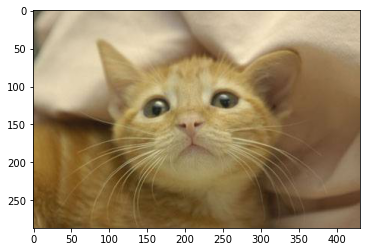

In [ ]:
img = Image.open(fname)
plt.imshow(img);

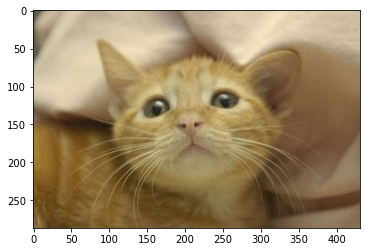

In [ ]:
img = cv2.imread(fname)[:,:,::-1]
plt.imshow(img);

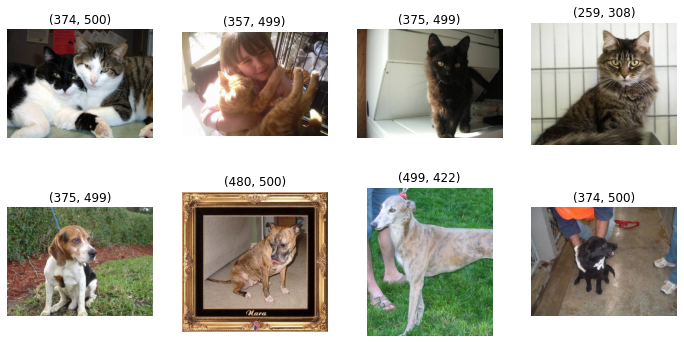

In [ ]:
plt.figure(figsize=(12,6))
for i in range(4):
    plt.subplot(2,4,i+1)
    cat = cv2.imread(os.path.join(train_cats_dir, train_cats_fnames[i]))[:,:,::-1]
    plt.imshow(cat), plt.axis('off'), plt.title(cat.shape[:-1])

    plt.subplot(2,4,i+5)
    dog = cv2.imread(os.path.join(train_dogs_dir, train_dogs_fnames[i]))[:,:,::-1]
    plt.imshow(dog), plt.axis('off'), plt.title(dog.shape[:-1])

plt.show()

- 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential([
    Conv2D(16, kernel_size=(3,3), padding='same', input_shape=(150, 150, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 32)        0

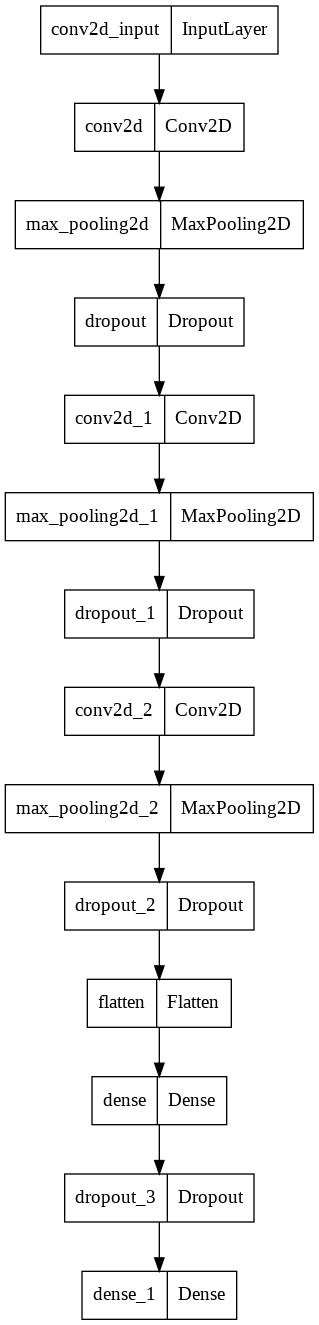

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

- 모델 설정

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001, decay=1e-8),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

- 파일에서 이미지 데이터 읽어오는 방법

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode='binary', target_size=(150,150)
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, batch_size=20, class_mode='binary', target_size=(150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_dir

'cats_and_dogs_filtered/train'

- callback 정의

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_path = 'best-cat-dog-v3.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [ ]:
hist = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    steps_per_epoch=1000,
    validation_steps=250,
    verbose=2,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69392, saving model to best-cat-dog-v2.h5
100/100 - 23s - loss: 1.1094 - accuracy: 0.5175 - val_loss: 0.6939 - val_accuracy: 0.5000 - 23s/epoch - 232ms/step
Epoch 2/100

Epoch 00002: val_loss improved from 0.69392 to 0.69060, saving model to best-cat-dog-v2.h5
100/100 - 10s - loss: 0.6983 - accuracy: 0.5255 - val_loss: 0.6906 - val_accuracy: 0.5310 - 10s/epoch - 104ms/step
Epoch 3/100

Epoch 00003: val_loss improved from 0.69060 to 0.67180, saving model to best-cat-dog-v2.h5
100/100 - 10s - loss: 0.6837 - accuracy: 0.5675 - val_loss: 0.6718 - val_accuracy: 0.5650 - 10s/epoch - 103ms/step
Epoch 4/100

Epoch 00004: val_loss did not improve from 0.67180
100/100 - 10s - loss: 0.6345 - accuracy: 0.6610 - val_loss: 0.7293 - val_accuracy: 0.5170 - 10s/epoch - 101ms/step
Epoch 5/100

Epoch 00005: val_loss improved from 0.67180 to 0.64611, saving model to best-cat-dog-v2.h5
100/100 - 10s - loss: 0.6089 - accuracy: 0.6905 - val_loss: 0.64

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)

- 테스트 이미지 분류

In [ ]:
from google.colab import files

up = files.upload()

Saving cat1.jfif to cat1.jfif
Saving cat2(lulu).jfif to cat2(lulu).jfif
Saving dog1.jfif to dog1.jfif
Saving dog2.jfif to dog2.jfif


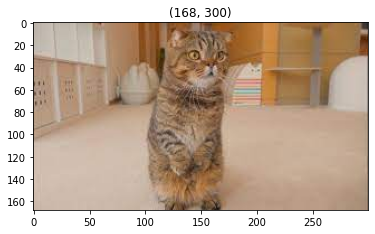

In [ ]:
img = cv2.imread('cat2(lulu).jfif')[:,:,::-1]
plt.imshow(img), plt.title(img.shape[:-1]);

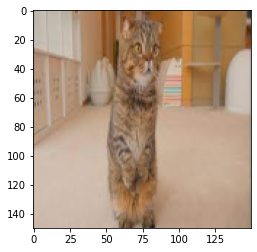

In [ ]:
img = cv2.resize(img, dsize=(150,150), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [ ]:
best_model.predict(img.reshape(1,150,150,3))

array([[9.638472e-05]], dtype=float32)

In [ ]:
for fname in up.keys():
    img = cv2.imread(fname)[:,:,::-1]
    if sum(img.shape[:-1]) > 300:
        img = cv2.resize(img, dsize=(150,150), interpolation=cv2.INTER_AREA)
    else:
        img = cv2.resize(img, dsize=(150,150), interpolation=cv2.INTER_CUBIC)
    classes = best_model.predict(img.reshape(1,150,150,3))
    print(f"{classes[0,0]} {fname} is a {'dog' if classes[0,0] > 0.5 else 'cat'}")

1.0 cat1.jfif is a dog
9.638471965445206e-05 cat2(lulu).jfif is a cat
1.0 dog1.jfif is a dog
1.0 dog2.jfif is a dog


- 학습과정 시각화

In [ ]:
import numpy as np
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)